In [1]:
%load_ext autoreload
%autoreload 1
import numpy as np
import scipy.special as special
import scipy.integrate as integrate
import matplotlib.pyplot as plt
# fake beta function
def special_beta(alpha, beta): return special.gamma(alpha)*special.gamma(beta)/special.gamma(alpha+beta)

In [2]:
import eko.dglap as dglap
import eko.interpolation as interpolation
%aimport eko.dglap
%aimport eko.interpolation

In [3]:
def plot_dist(x,y,yref):
    """compare to distributions both in linear and logarithmic x-space"""
    fig = plt.figure(figsize=(15,5))
    plt.subplot(2,3,1)
    plt.title("small x")
    plt.semilogx(x,y,"o")
    plt.semilogx(x,yref,"x")
    plt.subplot(2,3,4)
    plt.loglog(x,np.abs((y - yref)/yref),"x")
    plt.subplot(2,3,2)
    plt.title("linear x")
    plt.plot(x,y,"o")
    plt.plot(x,yref,"x")
    plt.subplot(2,3,5)
    plt.semilogy(x,np.abs((y - yref)/yref),"x")
    oMx = 1.0 - x
    ax = plt.subplot(2,3,3)
    oMx_min = 1e-2
    oMx_max = 0.5
    ax.set_xlim(oMx_min,oMx_max)
    plt.title("large x, i.e. small (1-x)")
    plt.loglog(oMx,y,"o")
    plt.loglog(oMx,yref,"x")
    ax = plt.subplot(2,3,6)
    ax.set_xlim(oMx_min,oMx_max)
    plt.loglog(oMx,np.abs((y - yref)/yref),"x")
    plt.xlabel("1-x")
    return fig

In [4]:
toy_xgrid = np.array([1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,.1,.3,.5,.7,.9])
# implement Eq. 31 of arXiv:hep-ph/0204316
def toy_uv0(x):
    return 5.107200 * x**(0.8) * (1.0 - x)**3 / x
def toy_dv0(x):
    return 3.064320 * x**(0.8) * (1.0 - x)**4 / x
def toy_g0(x):
    return 1.7 * x**(-0.1) * (1.0 - x)**5 / x
def toy_dbar0(x):
    return 0.1939875 *  x**(-0.1) *  (1.0 - x)**6 / x
def toy_ubar0(x):
    return (1.0 - x) * toy_dbar0(x)
def toy_s0(x):
    return 0.2 * (toy_ubar0(x) + toy_dbar0(x))
def toy_sbar0(x):
    return toy_s0(x)
def toy_Lm0(x):
    return toy_dbar0(x) - toy_ubar0(x)
def toy_Lp0(x):
    return (toy_dbar0(x) + toy_ubar0(x))*2.0 # 2 is missing in the paper!
def toy_sp0(x):
    return toy_s0(x) + toy_sbar0(x)
def toy_T30(x):
    return -2.0 * toy_Lm0(x) + toy_uv0(x) - toy_dv0(x)
def toy_T80(x):
    return toy_Lp0(x) + toy_uv0(x) + toy_dv0(x) - 2.0*toy_sp0(x)

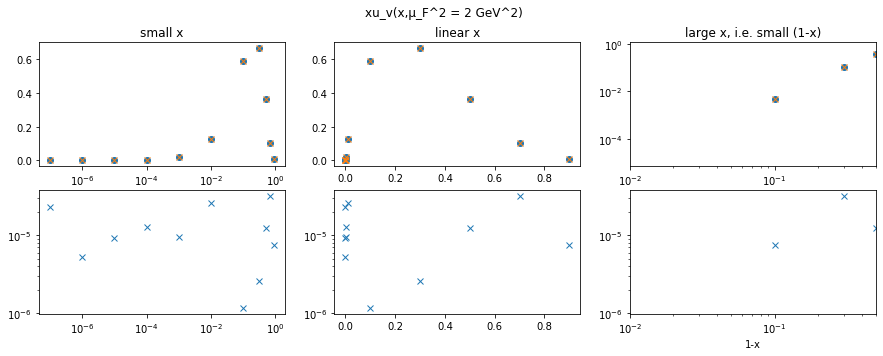

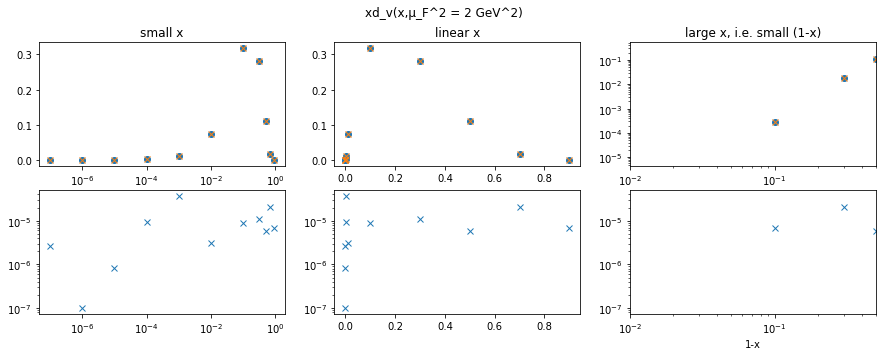

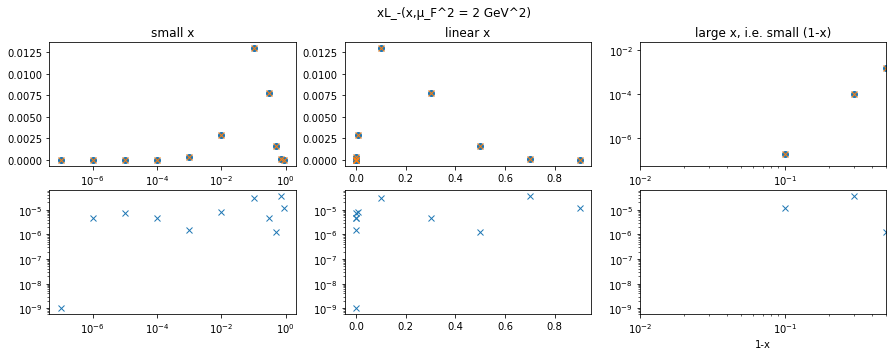

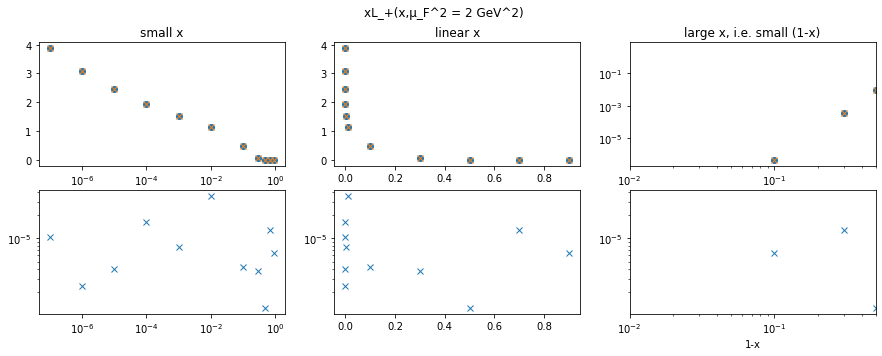

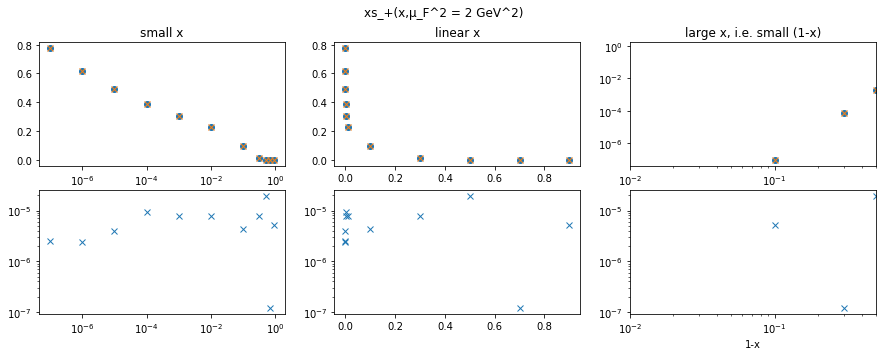

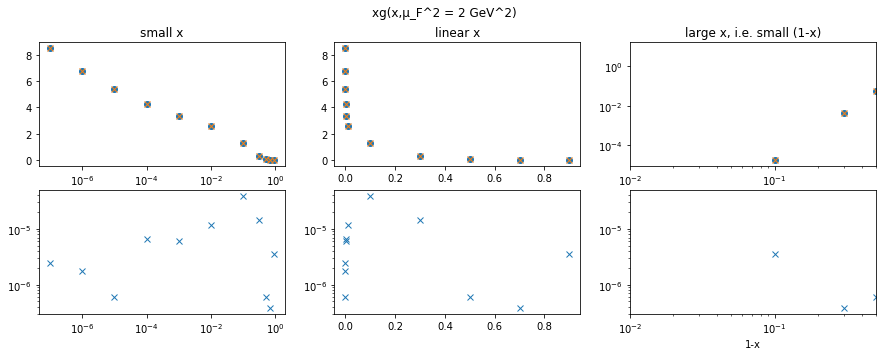

In [5]:
# check table 2 part 1 of arXiv:hep-ph/0204316
toy_uv0_grid = np.array([toy_uv0(x) for x in toy_xgrid])
toy_xuv0_grid_ref = np.array([1.2829e-5,8.0943e-5,5.1070e-4,3.2215e-3,2.0271e-2,1.2448e-1,5.9008e-1,6.6861e-1,3.6666e-1,1.0366e-1,4.6944e-3])
fig = plot_dist(toy_xgrid,toy_xgrid*toy_uv0_grid,toy_xuv0_grid_ref)
fig.suptitle("xu_v(x,µ_F^2 = 2 GeV^2)")

toy_dv0_grid = np.array([toy_dv0(x) for x in toy_xgrid])
toy_xdv0_grid_ref = np.array([7.6972e-6,4.8566e-5,3.0642e-4,1.9327e-3,1.2151e-2,7.3939e-2,3.1864e-1,2.8082e-1,1.1000e-1,1.8659e-2,2.8166e-4])
fig = plot_dist(toy_xgrid,toy_xgrid*toy_dv0_grid,toy_xdv0_grid_ref)
fig.suptitle("xd_v(x,µ_F^2 = 2 GeV^2)")

toy_Lm0_grid = np.array([toy_Lm0(x) for x in toy_xgrid])
toy_xLm0_grid_ref = np.array([9.7224e-8,7.7227e-7,6.1341e-6,4.8698e-5,3.8474e-4,2.8946e-3,1.2979e-2,7.7227e-3,1.6243e-3,1.0259e-4,1.7644e-7])
fig = plot_dist(toy_xgrid,toy_xgrid*toy_Lm0_grid,toy_xLm0_grid_ref)
fig.suptitle("xL_-(x,µ_F^2 = 2 GeV^2)")

toy_Lp0_grid = np.array([toy_Lp0(x) for x in toy_xgrid])
toy_xLp0_grid_ref = np.array([3.8890e+0,3.0891e+0,2.4536e+0,1.9478e+0,1.5382e+0,1.1520e+0,4.9319e-1,8.7524e-2,9.7458e-3,3.8103e-4,4.3129e-7])
fig = plot_dist(toy_xgrid,toy_xgrid*toy_Lp0_grid,toy_xLp0_grid_ref)
fig.suptitle("xL_+(x,µ_F^2 = 2 GeV^2)")

toy_sp0_grid = np.array([toy_sp0(x) for x in toy_xgrid])
toy_xsp0_grid_ref = np.array([7.7779e-1,6.1782e-1,4.9072e-1,3.8957e-1,3.0764e-1,2.3041e-1,9.8638e-2,1.7505e-2,1.9492e-3,7.6207e-5,8.6259e-8])
fig = plot_dist(toy_xgrid,toy_xgrid*toy_sp0_grid,toy_xsp0_grid_ref)
fig.suptitle("xs_+(x,µ_F^2 = 2 GeV^2)")

toy_g0_grid = np.array([toy_g0(x) for x in toy_xgrid])
toy_xg0_grid_ref = np.array([8.5202e+0,6.7678e+0,5.3756e+0,4.2681e+0,3.3750e+0,2.5623e+0,1.2638e+0,3.2228e-1,5.6938e-2,4.2810e-3,1.7180e-5])
fig = plot_dist(toy_xgrid,toy_xgrid*toy_g0_grid,toy_xg0_grid_ref)
fig.suptitle("xg(x,µ_F^2 = 2 GeV^2)");

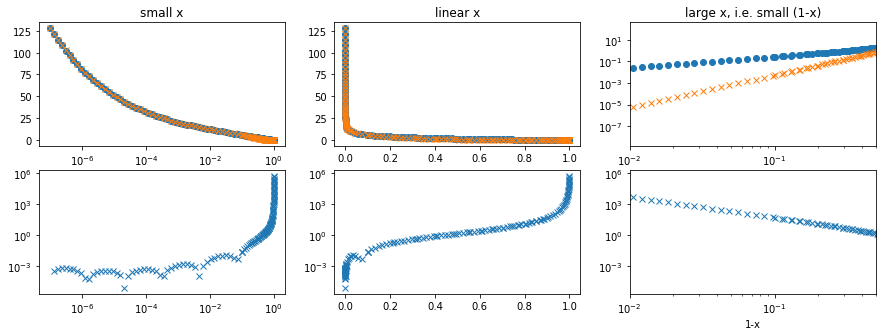

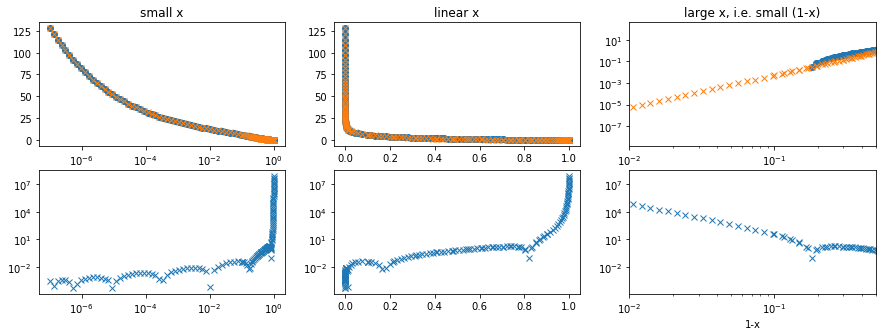

In [6]:
def plot_interpolation(f,g,xmin=1e-6):
    """plot f(x) and its interpolation obtained by n grid points"""
    n = len(g)
    fs = [f(x) for x in g]
    p = lambda xx: np.sum([fs[j] * interpolation.get_Lagrange_interpolators_log_x(xx,g,j) for j in range(n)])
    oMx = 1.0 - np.logspace(-3,np.log10(.9))
    xs = np.append(np.logspace(np.log10(xmin),-1),[np.linspace(0.1,.9),oMx])
    xs = np.sort(xs)
    ys = np.array([f(x) for x in xs])
    yps = np.array([p(x) for x in xs])
    plot_dist(xs,yps,ys)

f = toy_uv0
plot_interpolation(f,interpolation.get_xgrid_linear_at_log(7,1e-7),1e-7)
plot_interpolation(f,interpolation.get_xgrid_Chebyshev_at_log(7,1e-7),1e-7)

In [7]:
ret1 = dglap.run_dglap({
    "PTO": 0,
    'alphas': 0.35,
    'Qref': np.sqrt(2),
    'Q0': np.sqrt(2),
    'NfFF': 4,

    "xgrid_size": 10,
    "targetgrid": toy_xgrid,
    "Q2grid": [1e4]
})

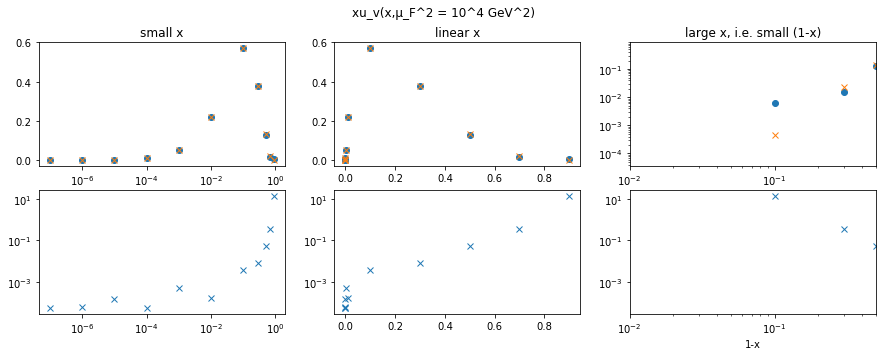

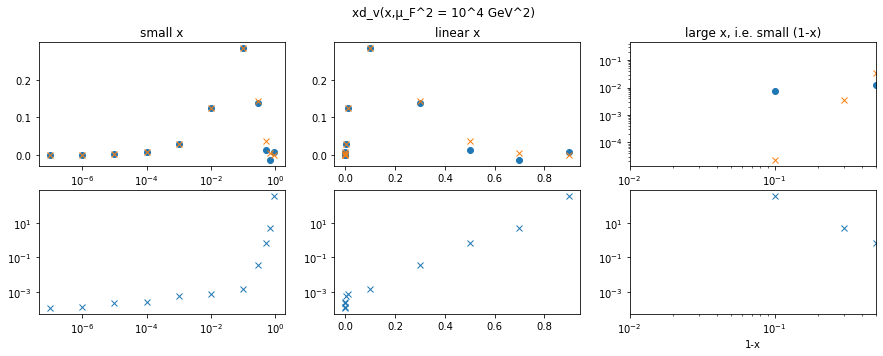

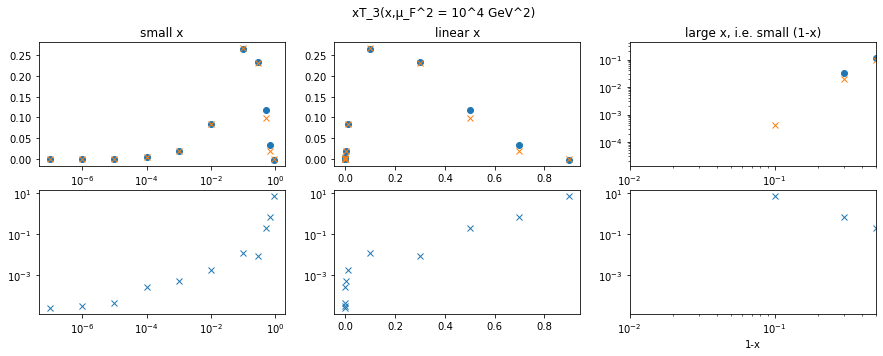

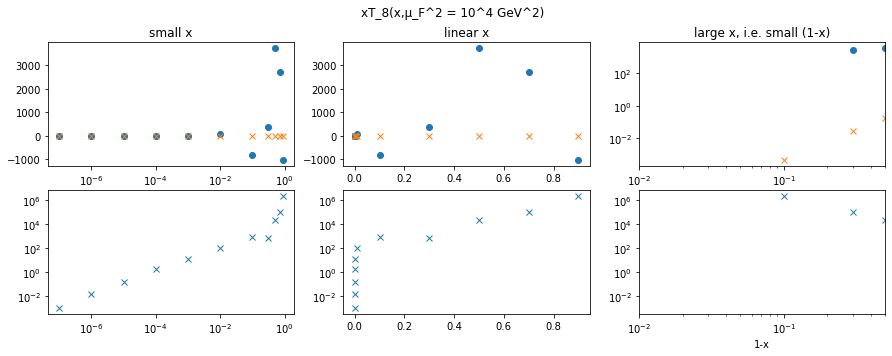

In [8]:
# check table 2 part 2 of arXiv:hep-ph/0204316
toy_uv1_xgrid = np.array([toy_uv0(x) for x in ret1["xgrid"]])
toy_uv1_grid = np.dot(ret1["operators"]["NS"],toy_uv1_xgrid)
toy_xuv1_grid_ref = np.array([5.7722e-5,3.3373e-4,1.8724e-3,1.0057e-2,5.0392e-2,2.1955e-1,5.7267e-1,3.7925e-1,1.3476e-1,2.3123e-2,4.3443e-4])
fig = plot_dist(toy_xgrid,toy_xgrid*toy_uv1_grid,toy_xuv1_grid_ref)
fig.suptitle("xu_v(x,µ_F^2 = 10^4 GeV^2)");

toy_dv1_xgrid = np.array([toy_dv0(x) for x in ret1["xgrid"]])
toy_dv1_grid = np.dot(ret1["operators"]["NS"],toy_dv1_xgrid)
toy_xdv1_grid_ref = np.array([3.4343e-5,1.9800e-4,1.1065e-3,5.9076e-3,2.9296e-2,1.2433e-1,2.8413e-1,1.4186e-1,3.5364e-2,3.5943e-3,2.2287e-5])
fig = plot_dist(toy_xgrid,toy_xgrid*toy_dv1_grid,toy_xdv1_grid_ref)
fig.suptitle("xd_v(x,µ_F^2 = 10^4 GeV^2)");

toy_T31_xgrid = np.array([toy_T30(x) for x in ret1["xgrid"]])
toy_T31_grid = np.dot(ret1["operators"]["NS"],toy_T31_xgrid)
toy_xLm1_grid_ref = np.array([7.6527e-7,5.0137e-6,3.1696e-5,1.9071e-4,1.0618e-3,4.9731e-3,1.0470e-2,3.3029e-3,4.2815e-4,1.5868e-5,1.1042e-8])
toy_xT31_grid_ref = -2.0 * toy_xLm1_grid_ref + toy_xuv1_grid_ref - toy_xdv1_grid_ref
fig = plot_dist(toy_xgrid,toy_xgrid*toy_T31_grid,toy_xT31_grid_ref)
fig.suptitle("xT_3(x,µ_F^2 = 10^4 GeV^2)");

toy_T81_xgrid = np.array([toy_T80(x) for x in ret1["xgrid"]])
toy_T81_grid = np.dot(ret1["operators"]["NS"],toy_T81_xgrid)
toy_xLp1_grid_ref = np.array([9.9465e+1,5.0259e+1,2.4378e+1,1.1323e+1,5.0324e+0,2.0433e+0,4.0832e-1,4.0165e-2,2.8624e-3,6.8961e-5,3.6293e-8])
toy_xsp1_grid_ref = np.array([4.8642e+1,2.4263e+1,1.1501e+1,5.1164e+0,2.0918e+0,7.2814e-1,1.1698e-1,1.0516e-2,7.3138e-4,1.7725e-5,1.0192e-8])
toy_xT81_grid_ref = toy_xLp1_grid_ref + toy_xuv1_grid_ref + toy_xdv1_grid_ref - 2.0 * toy_xsp1_grid_ref
fig = plot_dist(toy_xgrid,toy_xgrid*toy_T81_grid,toy_xT81_grid_ref)
fig.suptitle("xT_8(x,µ_F^2 = 10^4 GeV^2)");